<p style="background-color:lightgreen;font-family:newtimeroman;font-size:30px;line-height:1.7em;text-align:center;border-radius:5px 5px">Churn_modelling_ANN_Classification</p>

__Churn__ __Prediction__ __Model__ : 

It’s a predictive model that estimates — at the level of individual customers — the propensity (or susceptibility) they have to leave. For each customer at any given time, it tells us how high the risk is of losing them in the future.

Technically, it’s a binary classifier that divides clients into two groups (classes) — those who leave and those who don’t. In addition to assigning them to one of the two groups, it will typically give us the probability with which the client belongs to that group.

It is important to note that this is the probability of belonging to the group of clients who leave. Thus, it is the propensity to leave and not the probability of leaving. However, it is possible to estimate the probability through a churn model.


__Business__ __Problem__ : 

This data set contains details of a bank's customers and the target variable is a binary variable(Exited) reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.
The goal here is to predict whether a customer will churn (i.e. exited = 1) using the provided features.

In [1]:
# Importing required Libraries:

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Loading the dataset

data = pd.read_csv("C://PYTHON//AI_ML//Deep_Learning//Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Exploratory Data Analysis</p>

In [3]:
data.shape

(10000, 14)

In [4]:
# Some columns are totally unproductive so let's remove them
data = data.drop(["RowNumber","CustomerId","Surname",], axis =1)

In [5]:
data.shape

(10000, 11)

In [6]:
# Checking for duplicates
data.duplicated().sum()

0

In [7]:
# Getting the meta data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
# Getting stats about dataset
data.describe().T.style.set_properties(**{'background-color': 'cyan','color': 'black','border-color': 'red'})

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000
Exited,10000.000000,0.203700,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000


In [9]:
# Checking for Null values
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Data Visualisation</p>

In [10]:
# Let's See How The Target feature is:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

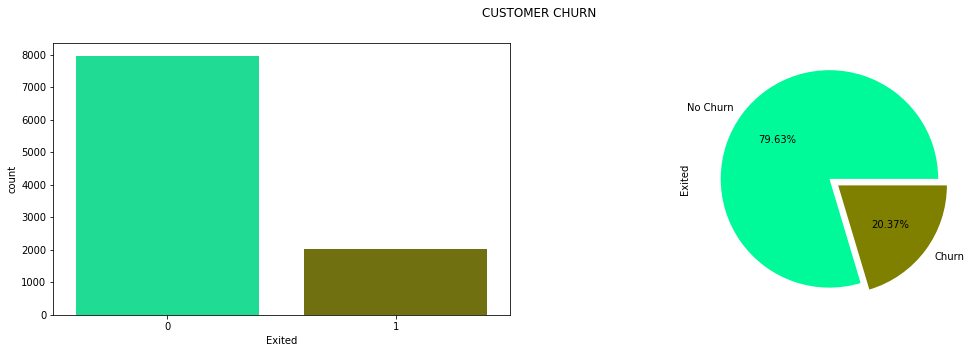

In [11]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(x=data['Exited'], palette=['mediumspringgreen','olive'])
plt.subplot(1,2,2)
data['Exited'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0,0.1], startangle=360, colors=['mediumspringgreen','olive'],labels = ['No Churn','Churn',])
plt.suptitle('CUSTOMER CHURN')
plt.show()

__Observation:__

We’re trying to predict users that left the bank in the previous month. It’s a binary classification problem with an unbalanced target.

    Churn:0 = No – 79.63%
    Churn:1 = Yes – 20.37%

In [12]:
# Let’s check how “Gender” and “Geography” are related to customer churn.
data[['Geography','Gender','Exited']].groupby(['Geography','Gender']).agg(['mean','count'])

Exited      
                      mean count
Geography Gender                
France    Female  0.203450  2261
          Male    0.127134  2753
Germany   Female  0.375524  1193
          Male    0.278116  1316
Spain     Female  0.212121  1089
          Male    0.131124  1388

__Observation:__
    
- From  the above information Female Exited rate is higher than males in three countries and the country germany is in frist palce with high churn rate.

In [13]:
data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


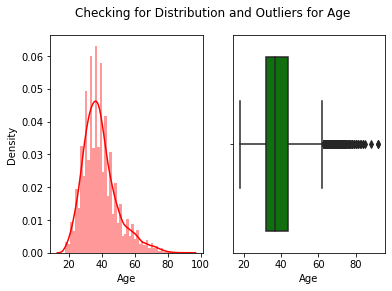

In [14]:
plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.distplot(data["Age"], color = "red")
plt.subplot(1,2,2)
sns.boxplot(data["Age"], color = "green")
plt.suptitle("Checking for Distribution and Outliers for Age")
plt.show()

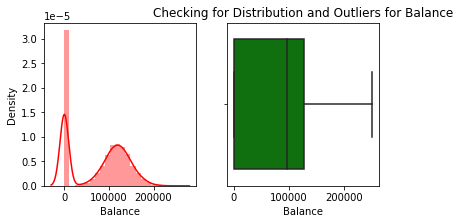

In [15]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
sns.distplot(data["Balance"], color = "red")
plt.subplot(1,2,2)
sns.boxplot(data["Balance"], color = "green")
plt.title("Checking for Distribution and Outliers for Balance")
plt.show()

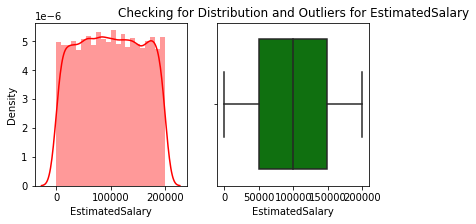

In [16]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
sns.distplot(data["EstimatedSalary"], color = "red")
plt.subplot(1,2,2)
sns.boxplot(data["EstimatedSalary"], color = "green")
plt.title("Checking for Distribution and Outliers for EstimatedSalary")
plt.show()

<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Feature Engineering</p> 

In [17]:
# OneHotEncoding of Categorical data
from sklearn.preprocessing import OneHotEncoder

In [18]:
ohe = OneHotEncoder(sparse=False)

In [19]:
ohe_data = ohe.fit_transform(data[['Geography','Gender']])

In [20]:
ohe_data

array([[1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [21]:
cols = ohe.get_feature_names_out()
cols

array(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'], dtype=object)

In [22]:
ohenew = pd.DataFrame(ohe_data, columns = cols)
ohenew

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0
9996,1.0,0.0,0.0,0.0,1.0
9997,1.0,0.0,0.0,1.0,0.0
9998,0.0,1.0,0.0,0.0,1.0


In [23]:
data1 = data.drop(["Geography","Gender"], axis = 1)

In [24]:
data1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [25]:
new_data = pd.concat([ohenew,data1], axis=1)
new_data

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,1.0,0.0,619,42,2,0.00,1,1,1,101348.88,1
1,0.0,0.0,1.0,1.0,0.0,608,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,0.0,1.0,0.0,502,42,8,159660.80,3,1,0,113931.57,1
3,1.0,0.0,0.0,1.0,0.0,699,39,1,0.00,2,0,0,93826.63,0
4,0.0,0.0,1.0,1.0,0.0,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0,771,39,5,0.00,2,1,0,96270.64,0
9996,1.0,0.0,0.0,0.0,1.0,516,35,10,57369.61,1,1,1,101699.77,0
9997,1.0,0.0,0.0,1.0,0.0,709,36,7,0.00,1,0,1,42085.58,1
9998,0.0,1.0,0.0,0.0,1.0,772,42,3,75075.31,2,1,0,92888.52,1


In [26]:
# SMOTE TECHNIQUE

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smt = SMOTE()

In [29]:
x = new_data.drop(["Exited"], axis = 1)

In [30]:
y = new_data["Exited"]

In [31]:
x

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,1.0,0.0,619,42,2,0.00,1,1,1,101348.88
1,0.0,0.0,1.0,1.0,0.0,608,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,1.0,0.0,502,42,8,159660.80,3,1,0,113931.57
3,1.0,0.0,0.0,1.0,0.0,699,39,1,0.00,2,0,0,93826.63
4,0.0,0.0,1.0,1.0,0.0,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0,771,39,5,0.00,2,1,0,96270.64
9996,1.0,0.0,0.0,0.0,1.0,516,35,10,57369.61,1,1,1,101699.77
9997,1.0,0.0,0.0,1.0,0.0,709,36,7,0.00,1,0,1,42085.58
9998,0.0,1.0,0.0,0.0,1.0,772,42,3,75075.31,2,1,0,92888.52


In [32]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [33]:
x, y =  smt.fit_resample(x, y)

In [34]:
x.shape, y.shape

((15926, 13), (15926,))

___TRAIN_TEST_SPLIT___

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=41,shuffle = True,test_size=0.30)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11148, 13), (4778, 13), (11148,), (4778,))

<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Model Building</p>

In [38]:
from keras import Sequential
from keras.layers.normalization import layer_normalization
from keras.layers import Dense

In [39]:
ann = Sequential()
ann.add(Dense(units = 13, kernel_initializer = "random_uniform", activation = "relu", input_dim = x_train.shape[1]))
ann.add(Dense(units = 7, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 4, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 2, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 1, kernel_initializer = "random_uniform", activation = "sigmoid"))

In [40]:
ann.compile(loss = ['binary_crossentropy'], optimizer = "adam", metrics =["accuracy"])

In [41]:
ann.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 7)                 98        
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [42]:
ann.fit(x_train, y_train, validation_data = (x_test, y_test), epochs =500, batch_size = 500)

Epoch 1/500
23/23 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6929 - val_accuracy: 0.5416
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5243 - val_loss: 0.6901 - val_accuracy: 0.5733
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5679 - val_loss: 0.6882 - val_accuracy: 0.5726
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5698 - val_loss: 0.6877 - val_accuracy: 0.5726
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5693 - val_loss: 0.6873 - val_accuracy: 0.5728
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5693 - val_loss: 0.6863 - val_accuracy: 0.5722
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5696 - val_loss: 0.6859 - val_accuracy: 0.5716
Epoch 8/500
2

Epoch 59/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5728 - val_loss: 0.6814 - val_accuracy: 0.5804
Epoch 60/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5717 - val_loss: 0.6809 - val_accuracy: 0.5735
Epoch 61/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5716 - val_loss: 0.6810 - val_accuracy: 0.5726
Epoch 62/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5712 - val_loss: 0.6813 - val_accuracy: 0.5726
Epoch 63/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5729 - val_loss: 0.6812 - val_accuracy: 0.5747
Epoch 64/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5712 - val_loss: 0.6812 - val_accuracy: 0.5747
Epoch 65/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5715 - val_loss: 0.6812 - val_accuracy: 0.5751
Epoch 

23/23 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5741 - val_loss: 0.6800 - val_accuracy: 0.5768
Epoch 174/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5750 - val_loss: 0.6800 - val_accuracy: 0.5776
Epoch 175/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5761 - val_loss: 0.6798 - val_accuracy: 0.5802
Epoch 176/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5718 - val_loss: 0.6813 - val_accuracy: 0.5818
Epoch 177/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5701 - val_loss: 0.6802 - val_accuracy: 0.5758
Epoch 178/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5759 - val_loss: 0.6800 - val_accuracy: 0.5749
Epoch 179/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5771 - val_loss: 0.6802 - val_accuracy: 0.5756
Epoch 180/500

23/23 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.6735 - val_loss: 0.6275 - val_accuracy: 0.6683
Epoch 288/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.6809 - val_loss: 0.6665 - val_accuracy: 0.6243
Epoch 289/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6521 - val_loss: 0.6227 - val_accuracy: 0.6760
Epoch 290/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.6773 - val_loss: 0.6556 - val_accuracy: 0.6321
Epoch 291/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.6450 - val_loss: 0.6762 - val_accuracy: 0.6030
Epoch 292/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.6636 - val_loss: 0.6194 - val_accuracy: 0.6796
Epoch 293/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.6605 - val_loss: 0.6217 - val_accuracy: 0.6779
Epoch 294/500

23/23 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.7156 - val_loss: 0.5673 - val_accuracy: 0.7233
Epoch 402/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.7182 - val_loss: 0.5672 - val_accuracy: 0.7231
Epoch 403/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7128 - val_loss: 0.5829 - val_accuracy: 0.7082
Epoch 404/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7260 - val_loss: 0.5824 - val_accuracy: 0.7091
Epoch 405/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7202 - val_loss: 0.5703 - val_accuracy: 0.7179
Epoch 406/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.7264 - val_loss: 0.5766 - val_accuracy: 0.7193
Epoch 407/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7246 - val_loss: 0.5784 - val_accuracy: 0.7110
Epoch 408/500

In [43]:
# Evaluate model with evaluate() method
test_loss, test_acc = ann.evaluate(x_test, y_test)

150/150 [==============================] - 0s 482us/step - loss: 0.5779 - accuracy: 0.7221


In [44]:
# Accuracy of the model 
print('Test accuracy:', round(test_acc,4))

Test accuracy: 0.7221


In [45]:
# Loss of the model 
print('Test loss:', round(test_loss,4))

Test loss: 0.5779


In [49]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm.ravel()

array([1944,  458,  870, 1506], dtype=int64)

In [48]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.81      0.69      0.75      2814
        True       0.63      0.77      0.69      1964

    accuracy                           0.72      4778
   macro avg       0.72      0.73      0.72      4778
weighted avg       0.74      0.72      0.72      4778



<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Conclusion</p>

1. In this project i got 72% of test accuracy.

2. You can improve model accuracy by doing : 

     a) Treating missing valuse, Outliers
     
     b) Feature Transformation
     
     c) Feature Selection
     
     d) Tuning Hyper parameters in Algorithm